In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
train_features = df_train.drop(['y'], axis = 1)
train_dependent = df_train['y']

In [4]:
print(df_test.shape)
print(train_features.shape)
print(train_dependent.shape)

(890, 79)
(3865, 79)
(3865,)


In [5]:
features = pd.concat([train_features, df_test], axis = 0)

# Data Understanding

In [6]:
df_train

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46

In [7]:
df_test.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
df = pd.concat([df_train,df_test])

In [9]:
df.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46

# Data Cleaning

### Nan

In [10]:
null=features.isna().sum().sort_values()/len(df)*100
null_df=pd.DataFrame(null.sort_values())
null_df.head(50)

,0
galactic year,0.000000
galaxy,0.000000
existence expectancy index,0.126183
existence expectancy at birth,0.126183
Gross income per capita,0.694006
Income Index,0.694006
Expected years of education (galactic years),2.902208
Mean years of education (galactic years),7.802313
Intergalactic Development Index (IDI),8.391167
Education Index,8.391167


In [11]:
colm=features.columns
feature_index=[]
for i in colm:
    perc=features[i].isnull().sum()/len(features)*100
    if perc < 60:
        feature_index.append(features.columns.get_loc(i))

In [12]:
feature_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [13]:
features=pd.DataFrame(features.iloc[:,feature_index])

In [14]:
features.shape

(4755, 14)

In [15]:
df_mice=features.drop('galaxy',axis=1)
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

### Outlier Check

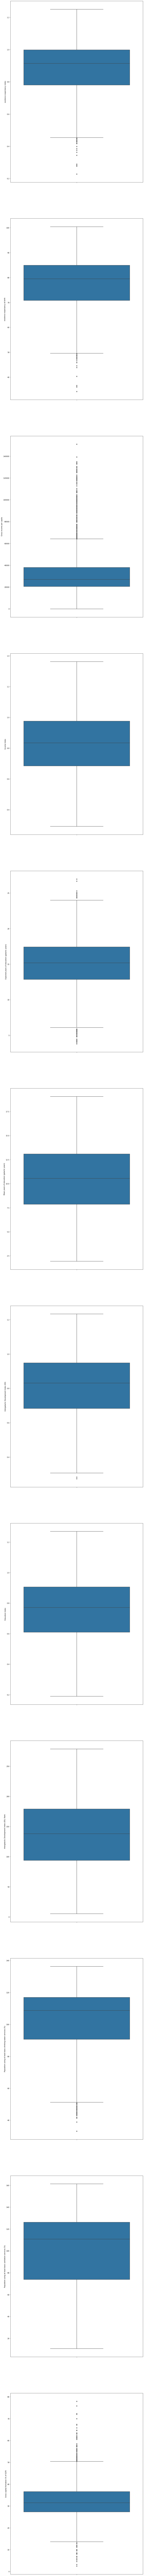

In [16]:
columns=df_mice_imputed.columns[1:]
fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(15,300))
for i in range(len(columns)):
    sns.boxplot(ax=axes[i],y=columns[i],data=df)

In [17]:
df_mice_imputed

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP)
0,990025.0,0.628657,63.125200,27109.234310,0.646039,8.240543,5.464558,0.544202,0.418192,184.025435,74.678558,59.182616,38.305483
1,990025.0,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,97.415695,92.515007,36.255559
2,990025.0,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,69.975604,49.674320,18.093991
3,990025.0,0.555862,52.333293,13593.776398,0.555449,9.063229,5.534055,0.486762,0.427583,199.639008,67.058404,46.322924,28.306415
4,990025.0,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,112.092365,125.212542,34.497468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,1016064.0,0.920918,79.770085,33147.474992,0.848530,16.381343,11.378896,0.849612,0.819499,158.874206,103.265453,100.320121,33.062975
4751,1016064.0,0.920918,79.770085,33147.474992,0.848530,16.381343,11.378896,0.849612,0.819499,158.874206,103.265453,100.320121,33.062975
4752,1016064.0,0.920918,79.770085,33147.474992,0.848530,16.381343,11.378896,0.849612,0.819499,158.874206,103.265453,100.320121,33.062975
4753,1016064.0,0.920918,79.770085,33147.474992,0.848530,16.381343,11.378896,0.849612,0.819499,158.874206,103.265453,100.320121,33.062975


In [18]:
df_mice_imputed['galaxy']=list(features.galaxy)

ohe_df=pd.get_dummies(df_mice_imputed,'galaxy')
ohe_df

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),galaxy_Andromeda Galaxy (M31),galaxy_Andromeda I,galaxy_Andromeda II,galaxy_Andromeda III,galaxy_Andromeda IX,galaxy_Andromeda V,galaxy_Andromeda VIII,galaxy_Andromeda X,galaxy_Andromeda XI,galaxy_Andromeda XII,galaxy_Andromeda XIX[60],galaxy_Andromeda XV,galaxy_Andromeda XVII,galaxy_Andromeda XVIII[60],galaxy_Andromeda XX,galaxy_Andromeda XXIII,galaxy_Andromeda XXII[57],galaxy_Andromeda XXIV,galaxy_Andromeda XXIX,galaxy_Andromeda XXI[57],galaxy_Andromeda XXV,galaxy_Andromeda XXVI,galaxy_Andromeda XXVIII,galaxy_Antlia 2,galaxy_Antlia B,galaxy_Antlia Dwarf,galaxy_Aquarius Dwarf Galaxy (DDO 210),galaxy_Aquarius II,galaxy_Barnard's Galaxy (NGC 6822),galaxy_Boötes I,galaxy_Boötes II,galaxy_Boötes III,galaxy_Boötes IV,galaxy_Camelopardalis B,galaxy_Canes Venatici I Dwarf,galaxy_Canes Venatici II Dwarf,galaxy_Carina Dwarf (E206-G220),galaxy_Carina II,galaxy_Carina III,galaxy_Cas 1 (KK98 19),"galaxy_Cassiopeia Dwarf (Cas dSph, Andromeda VII)",galaxy_Cassiopeia II (Andromeda XXX),galaxy_Cassiopeia III (Andromeda XXXII),galaxy_Cetus Dwarf,galaxy_Cetus III,galaxy_Columba I,galaxy_Coma Berenices Dwarf,galaxy_Crater II,galaxy_DDO 99 (UGC 6817),galaxy_Donatiello I,galaxy_Draco Dwarf (DDO 208),galaxy_Draco II,galaxy_Dwingeloo 1,galaxy_Dwingeloo 2,galaxy_ESO 274-01[70],galaxy_ESO 294-010,galaxy_ESO 321-014[70],galaxy_ESO 325-11,galaxy_ESO 383-087 (ISG 39),galaxy_ESO 410-G005,galaxy_ESO 540-030 (KDG 2),galaxy_ESO 540-032,galaxy_Eridanus II,galaxy_FM2000 1,galaxy_Fornax Dwarf (E356-G04),galaxy_GR 8 (DDO 155),galaxy_Grus I,galaxy_Grus II,galaxy_HIPASS J1247-77,galaxy_HIZSS 003,galaxy_Hercules Dwarf,"galaxy_Holmberg II (DDO 50, UGC 4305)",galaxy_Horologium I,galaxy_Horologium II,galaxy_Hydra II,galaxy_Hydrus I,galaxy_IC 10 (UGC 192),galaxy_IC 1613 (UGC 668),galaxy_IC 3104,galaxy_IC 342,galaxy_IC 4662 (ESO 102-14),galaxy_IC 5152,galaxy_Indus II,galaxy_KK98 35,galaxy_KK98 77,galaxy_KKH 11 (ZOAG G135.74-04.53),galaxy_KKH 12,galaxy_KKH 37 (Mai 16),galaxy_KKR 03 (KK98 230),galaxy_KKR 25,galaxy_KKh 060,galaxy_KKh 086,galaxy_KKh 98,galaxy_KKs 3,galaxy_KUG 1210+301B (KK98 127),galaxy_Lacerta I (Andromeda XXXI),galaxy_Large Magellanic Cloud (LMC),"galaxy_Leo A (Leo III, DDO 69)","galaxy_Leo I Dwarf (DDO 74, UGC 5470)","galaxy_Leo II Dwarf (Leo B, DDO 93)",galaxy_Leo IV Dwarf,galaxy_Leo P,galaxy_Leo T Dwarf,galaxy_Leo V Dwarf,galaxy_M110 (NGC 205),galaxy_M32 (NGC 221),galaxy_MB 1 (KK98 21),galaxy_MB 3,galaxy_Maffei 1,galaxy_Maffei 2,galaxy_NGC 147 (DDO 3),galaxy_NGC 1560,galaxy_NGC 1569 (UGC 3056),galaxy_NGC 185,galaxy_NGC 2366,galaxy_NGC 2403,galaxy_NGC 247,galaxy_NGC 300,galaxy_NGC 3109,galaxy_NGC 3741,galaxy_NGC 404,galaxy_NGC 4163 (NGC 4167),galaxy_NGC 4214 (UGC 7278),galaxy_NGC 5102,galaxy_NGC 5206,galaxy_NGC 5237,galaxy_NGC 5253,galaxy_NGC 55,galaxy_Pegasus Dwarf Irregular (DDO 216),galaxy_Pegasus Dwarf Sph (And VI),galaxy_Pegasus III,galaxy_Perseus I (Andromeda XXXIII),galaxy_Phoenix Dwarf Galaxy (P 6830),galaxy_Phoenix II,galaxy_Pictor II,galaxy_Pisces Dwarf,galaxy_Pisces I,galaxy_Pisces II,galaxy_Pisces III (Andromeda XIII),galaxy_Pisces IV (Andromeda XIV),galaxy_Pisces V (Andromeda XVI),galaxy_Reticulum II,galaxy_Reticulum III,galaxy_Sagittarius Dwarf Irregular Galaxy (SagDIG),galaxy_Sagittarius Dwarf Sphr SagDEG,galaxy_Sagittarius II,galaxy_Sculptor Dwarf (E351-G30),galaxy_Segue 1,galaxy_Segue 2,"galaxy_Sextans A (92205, DDO 75)",galaxy_Sextans B (UGC 5373),galaxy_Sextans Dwarf Sph,"galaxy_Small Magellanic Cloud (SMC, NGC 292)",galaxy_Triangulum Galaxy (M33),galaxy_Triangulum II,galaxy_Tucana Dwarf,galaxy_T

In [19]:
# Robust scaler will handler outlier also some algortims doing this proceses by themselves

In [20]:
# There is not any categorical feature to encoding

# Modelling

In [21]:
# lasso(robust)
# 
# gradient boosting
# light
# xgboost

In [22]:
x_train = ohe_df.iloc[:len(train_dependent), :]
x_test = ohe_df.iloc[len(train_dependent):, :]
y_train = train_dependent
train_set = pd.concat([x_train, y_train], axis=1)

In [23]:
n_folds = 5

def rmse_score(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [24]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))

#RandomForestRegression
rf = RandomForestRegressor(max_depth=20,max_features=8,
                           min_samples_leaf=3,min_samples_split=8,
                           n_estimators=100,random_state=42)

#lightgbm
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state=42)

#gradboost
gdb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

#xgboost
xgb = XGBRegressor(colsample_bytree=0.8, gamma=0.01, 
                             learning_rate=0.5, max_depth=8, 
                             n_estimators=300,reg_alpha=0.4640,
                             subsample=0.8,random_state =42)


In [25]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [26]:
#lasso
lasso.fit(x_train.values, y_train)
lasso_train_pred = lasso.predict(x_train)
lasso_pred = np.expm1(lasso.predict(x_test.values))
print('Lasso',rmsle(y_train, lasso_train_pred))

Lasso 0.03788502307286061


In [27]:
#RandomForestRegression
rf.fit(x_train.values, y_train)
rf_train_pred = rf.predict(x_train)
rf_pred = np.expm1(rf.predict(x_test.values))
print('RandomForestRegression',rmsle(y_train, rf_train_pred))

RandomForestRegression 0.027047360704722984


In [28]:
#lightgbm
lgb.fit(x_train.values, y_train)
lgb_train_pred = lgb.predict(x_train)
lgb_pred = np.expm1(lgb.predict(x_test.values))
print('\nLightgbm',rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5

Lightgbm 0.01233844008721696


In [29]:
#gradboost
gdb.fit(x_train.values, y_train)
gdb_train_pred = gdb.predict(x_train)
gdb_pred = np.expm1(gdb.predict(x_test.values))
print('\nGradientBoostingRegressor',rmsle(y_train, gdb_train_pred))


GradientBoostingRegressor 0.012475396390604597


In [30]:
#xgboost
xgb.fit(x_train.values, y_train)
xgb_train_pred = xgb.predict(x_train)
xgb_pred = np.expm1(xgb.predict(x_test.values))
print('\nXGBRegressor',rmsle(y_train, xgb_train_pred))


XGBRegressor 0.018424115309406987


### Stacking
I selected XGBoost, LGBM and Gradiendboost as estimer for Staking because of giving higher score rather than i tested. As a final estimor, i used XGBoost.

In [31]:
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(XGBRegressor(), 
                            LGBMRegressor(), GradientBoostingRegressor()),
                            meta_regressor=XGBRegressor(), cv=10,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=1)

In [32]:
stack.fit(x_train.values, y_train)
stack_train_pred = stack.predict(x_train)
stack_pred = np.expm1(stack.predict(x_test.values))
print('\nStack',rmsle(y_train, stack_train_pred))


Stack 0.010547455304195163


## Submission

In [91]:
stack_pred_df=pd.DataFrame(stack_pred)
stack_pred_df.columns=['pred']
stack_pred_df.to_csv('new_preds.csv')

In [92]:
stack_pred_df.head()

,pred
0,0.041746
1,0.040417
2,0.041253
3,0.041380
4,0.023725


# Optimization

In [93]:
ss=pd.read_csv('new_preds.csv')

In [94]:
index = ss['pred']
pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
ss["p2"] = p2

ss['opt_pred'] = 0

eei=x_test['existence expectancy index'].reset_index()
ss['eei']=eei['existence expectancy index']

In [95]:
ss=ss.sort_values('p2',ascending=False)

ss=ss.reset_index(drop=True)

In [96]:
ss

,Unnamed: 0,pred,p2,opt_pred,eei
0,522,0.015008,44.736930,0,0.978900
1,49,0.017253,43.594179,0,0.671839
2,203,0.018215,43.137452,0,0.817258
3,186,0.019042,42.758825,0,0.806444
4,269,0.019305,42.640927,0,0.859797
...,...,...,...,...,...
885,873,0.611832,12.076222,0,1.151445
886,800,0.633441,11.839967,0,1.085557
887,822,0.637203,11.799877,0,1.100220
888,583,0.730478,10.893035,0,0.996074


In [78]:
n = 340
#Giving the max of Energy to the 340 first element (ordered using the likely Increasing Index)
ss.opt_pred[:n]=100
ss.opt_pred[n:] = 0
c=100
alpha = 0.62685
for i in range(n,374):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
alpha=0.067345
for i in range(374,455):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
  else:
    ss.loc[i,'opt_pred'] = 0
alpha = 0.03
for i in range(455,465):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
alpha=0.4339465
for i in range(465,890):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
  else:
    ss.loc[i,'opt_pred'] = 0

print(ss.opt_pred.sum())

49999.995680999906


In [79]:
print("sum",ss.opt_pred.sum())
print("left", (50000-ss.opt_pred.sum())) 
print("eei Sum",ss[ss.eei < 0.7]['opt_pred'].sum())

sum 49999.995680999906
left 0.004319000094255898
eei Sum 6454.740478499999


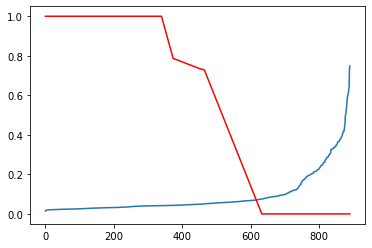

In [80]:
plt.plot(ss.pred)
plt.plot(ss.opt_pred/100,color="red")
plt.show()

In [81]:
ss.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
ss.head()

,index,pred,p2,opt_pred,eei
0,522,0.015008,44.736930,100.0,0.978900
1,49,0.017253,43.594179,100.0,0.671839
2,203,0.018215,43.137452,100.0,0.817258
3,186,0.019042,42.758825,100.0,0.806444
4,269,0.019305,42.640927,100.0,0.859797


In [82]:
ss=ss.sort_values('index',ascending=True)
ss=ss.reset_index(drop=True)

In [83]:
ss[['index', 'pred', 'opt_pred']].to_csv('final.csv', index=False)

In [84]:
final_df=pd.read_csv('final.csv')
final_df

,index,pred,opt_pred
0,0,0.041746,100.0
1,1,0.040417,100.0
2,2,0.041253,100.0
3,3,0.041380,100.0
4,4,0.023725,100.0
...,...,...,...
885,885,0.027264,100.0
886,886,0.027264,100.0
887,887,0.030220,100.0
888,888,0.037068,100.0
